In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

In [2]:
def gb_predict(X, trees_list, eta):
    
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions


def mean_squared_error(y_real, prediction):        
    return (sum((y_real - prediction)**2)) / len(y_real)


def residual(y, z):
    return - (z - y)


def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    trees = []

    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:

            target = gb_predict(X_train, trees, eta)

            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors


def get_error_plot_trees(n_trees, train_err, test_err):
    
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    
    plt.legend(loc='upper right')
    plt.show()


def get_error_plot_depth(n_max_depths, train_err, test_err):
    
    plt.xlabel('Max_depth')
    plt.ylabel('MSE')
    plt.xlim(0, n_max_depths)
    
    plt.plot(list(range(1, n_max_depths)), train_err, label='train error')
    plt.plot(list(range(1, n_max_depths)), test_err, label='test error')
    
    plt.legend(loc='upper right')
    plt.show()

In [3]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
n_trees = 10
max_depth = 3
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

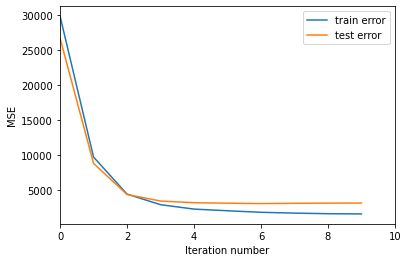

In [5]:
get_error_plot_trees(n_trees, train_errors, test_errors)

#### С увеличением числа деревьев обе ошибки вначале падают, затем тренинговая ошибка продолжает падение, а  тестовая остаётся примерно на одном уровне. Либо я не понял задание, либо я не понимаю, зачем задавать то, что есть в вебинаре, это же просто полное копирование кода.

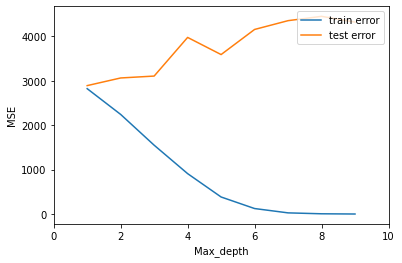

In [6]:
n_max_depths = 10
depths = []
train_errors_depth = []
test_errors_depth = []

for max_dep in range(1, n_max_depths):
    
    trees, train_errors_tree, test_errors_tree = gb_fit(n_trees, max_dep, X_train, X_test, y_train, y_test, eta)
    
    train_errors_depth.append(train_errors_tree[-1])
    test_errors_depth.append(test_errors_tree[-1])

get_error_plot_depth(n_max_depths, train_errors_depth, test_errors_depth)

#### С увеличением максимальной глубины каждого дерева тренинговая ошибка падает, а тестовая растёт => растёт переобучение

### Стохастический градиентный бустинг

In [7]:
def gb_fit_stoch(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, perc=0.5):
    
    trees = []

    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        train_ind = np.random.randint(X_train.shape[0], size=int(X_train.shape[0] * perc))

        if len(trees) == 0:
            
            tree.fit(X_train[train_ind], y_train[train_ind])
            
            train_errors.append(mean_squared_error(y_train[train_ind], gb_predict(X_train[train_ind], trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:

            target = gb_predict(X_train[train_ind], trees, eta)

            tree.fit(X_train[train_ind], residual(y_train[train_ind], target))
            
            train_errors.append(mean_squared_error(y_train[train_ind], gb_predict(X_train[train_ind], trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors


def get_error_plot_stoch(n_trees, test_err, test_err_stoch):
    
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)

    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.plot(list(range(n_trees)), test_err_stoch, label='test error stoch')
    
    plt.legend(loc='upper right')
    plt.show()


In [8]:
trees, train_errors_stoch, test_errors_stoch = gb_fit_stoch(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

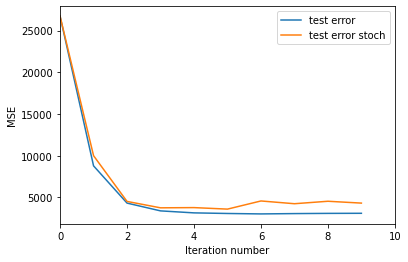

In [9]:
get_error_plot_stoch(n_trees, test_errors, test_errors_stoch)

### Оптимизация

In [10]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    trees = []

    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:

            target = gb_predict(X_train, trees, eta)

            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, target)) #ИЗМЕНЕНИЕ
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

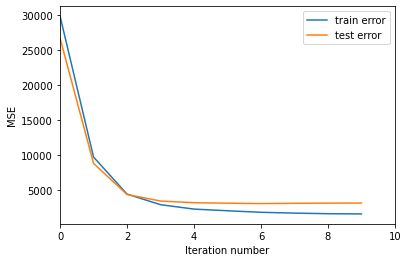

In [11]:
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
get_error_plot_trees(n_trees, train_errors, test_errors)